# Secure Bank Customer Segmentation (Bank Churn prediction)

Business Introduction
SecureBank is a leading financial institution that provides a wide range of banking services to individuals and businesses. The bank is committed to customer satisfaction, innovation, and financial security, and aims to be a trusted partner for its customers' financial needs.

Business Problem
SecureBank faces the challenge of optimizing customer retention and satisfaction in a highly competitive banking industry. To address this, the bank aims to gain a deeper understanding of its customer base, identify distinct customer segments, and tailor its marketing strategies and offerings to meet the unique needs and preferences of each segment. By leveraging customer segmentation techniques, SecureBank aims to enhance its ability to deliver personalized experiences, build stronger customer relationships, and ultimately improve customer loyalty.

Aim of Project
The goal of the project is to perform customer segmentation analysis on the bank's dataset to enhance customer retention and satisfaction. By utilizing data-driven insights and advanced analytics, SecureBank aims to identify distinct customer segments with similar characteristics and needs. This will enable the bank to develop targeted marketing strategies, personalized product offerings, and tailored communication to improve customer experiences and foster long-term loyalty.

Data Description
The dataset includes several features about each customer including:

- CLIENTNUM: Unique identifier for each bank customer.
- Attrition_Flag: Indicates whether the customer has churned or is an existing customer.
- Customer_Age: The age of the bank customer.
- Gender: The gender of the bank customer.
- Dependent_count: The number of dependents the bank customer has.
- Education_Level: The educational level of the bank customer.
- Marital_Status: The marital status of the bank customer.
- Income_Category: The income category of the bank customer.
- Card_Category: The card category held by the bank customer.
- Months_on_book: The number of months the bank customer has been a customer with the bank.
- Total_Relationship_Count: The total number of products held by the bank customer.
- Months_Inactive_12_mon: The number of months in the last 12 months during which the bank customer had no transactions.
- Contacts_Count_12_mon: The number of contacts the bank customer has had with the bank in the last 12 months.
- Credit_Limit: The credit limit assigned to the bank customer.
- Total_Revolving_Bal: The total balance on the revolving credit accounts.
- Avg_Open_To_Buy: The average amount available to the bank customer for new purchases.
- Total_Amt_Chng_Q4_Q1: The change in the transaction amount from Q4 to Q1.
- Total_Trans_Amt: The total transaction amount for the bank customer.
- Total_Trans_Ct: The total number of transactions made by the bank customer.
- Total_Ct_Chng_Q4_Q1: The change in the number of transactions from Q4 to Q1.
- Avg_Utilization_Ratio: The average utilization ratio of the bank customer's credit limit.

Project Scope

- Exploratory Data Analysis (EDA): Start by exploring and understanding the dataset through visualizations and statistical analysis.
- Feature Engineering: Improve the effectiveness of customer segmentation by engineering additional features from the existing dataset.
- Model Development: Perform customer segmentation on the enriched dataset using advanced machine learning algorithms and clustering techniques.
- Model Evaluation and Selection: Evaluate the performance of various segmentation models and select the most appropriate one based on predefined evaluation criteria.

In [17]:
import pandas as pd

df = pd.read_excel(r"C:\Users\PC\Desktop\Churners_data.xlsx") 

df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [18]:
# Removing the last two columns
df = df.iloc[:, :-2]

# Displaying the first few rows of the updated dataset
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


- The last two columns, which correspond to the outputs of a Naive Bayes Classifier, have been successfully removed. Now, the dataset only includes relevant features for our analysis.

- Next, let's perform some initial Exploratory Data Analysis (EDA) to understand more about the data. We'll start by investigating the distributions of the numerical and categorical variables, and then check for missing values.

In [19]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing values
missing_values = df.isnull().sum()

# Descriptive statistics of numerical variables
numerical_stats = df.describe()

# Count of distinct categories in categorical variables
categorical_counts = df.select_dtypes(include=['object']).nunique()

missing_values, numerical_stats, categorical_counts


(CLIENTNUM                   0
 Attrition_Flag              0
 Customer_Age                0
 Gender                      0
 Dependent_count             0
 Education_Level             0
 Marital_Status              0
 Income_Category             0
 Card_Category               0
 Months_on_book              0
 Total_Relationship_Count    0
 Months_Inactive_12_mon      0
 Contacts_Count_12_mon       0
 Credit_Limit                0
 Total_Revolving_Bal         0
 Avg_Open_To_Buy             0
 Total_Amt_Chng_Q4_Q1        0
 Total_Trans_Amt             0
 Total_Trans_Ct              0
 Total_Ct_Chng_Q4_Q1         0
 Avg_Utilization_Ratio       0
 dtype: int64,
           CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.00000

- Missing Values: There are no missing values in the dataset.

- Numerical Variables: There are several numerical features in the dataset such as Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, and Contacts_Count_12_mon. The summary statistics for these features suggest varying ranges and distributions.

- Categorical Variables: The dataset includes several categorical features like Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, and Card_Category. Each of these features has multiple categories, with Education_Level having the most at 7 unique categories.

Next, let's visualize the distributions of these variables to get a clearer understanding of the data. We'll create histograms for numerical variables and bar plots for categorical variables. For the target variable Attrition_Flag, we'll create a pie chart to visualize the proportion of churned and existing customers.

## Univariate Analysis

### Histogram, Bar and Pie chart

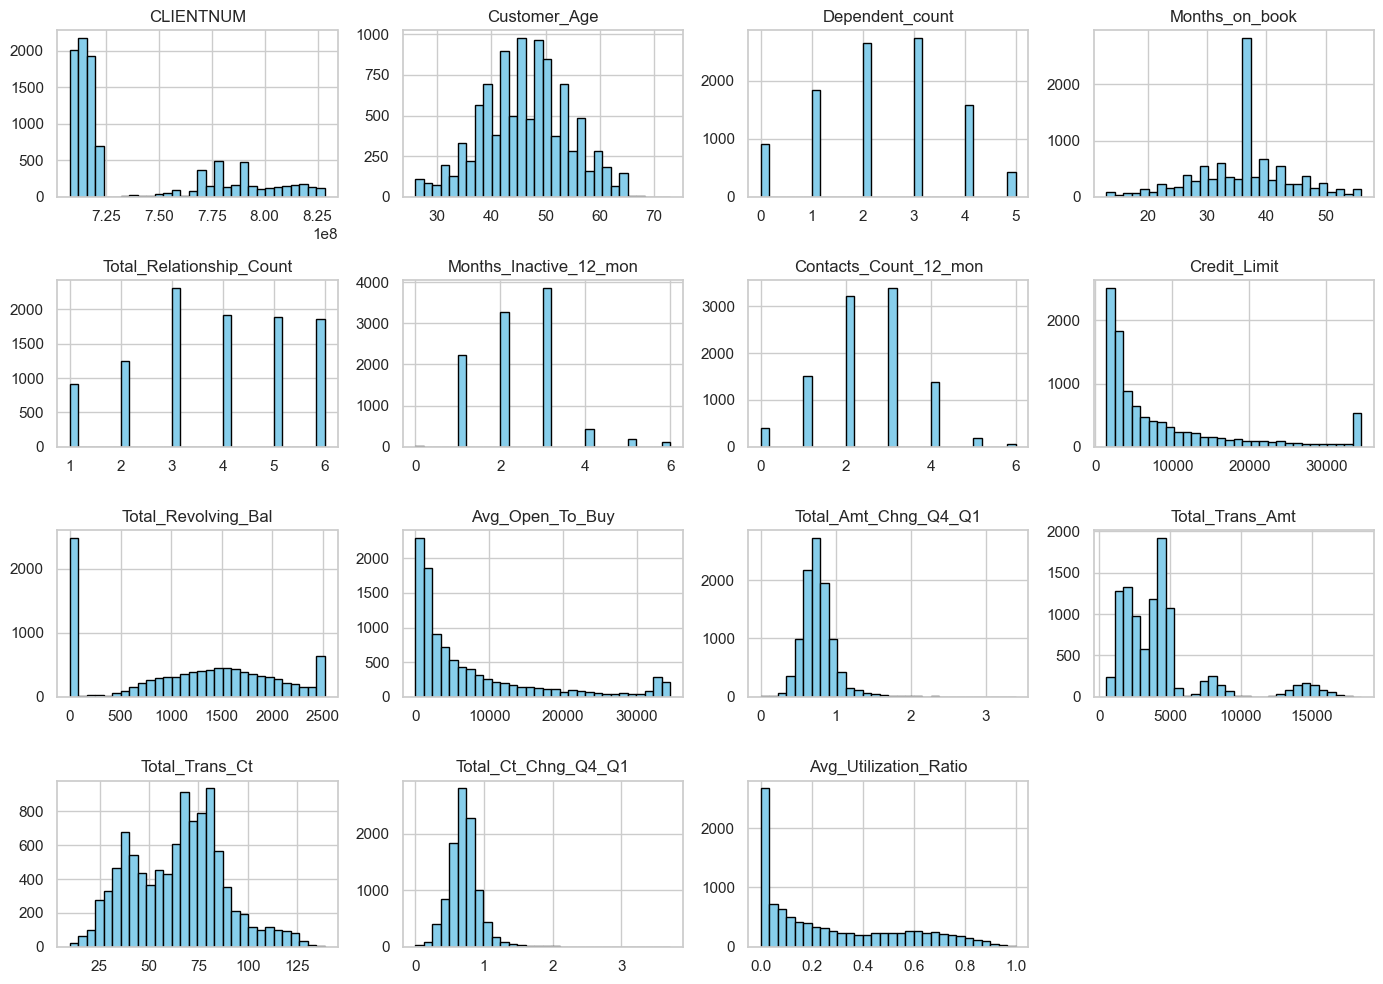

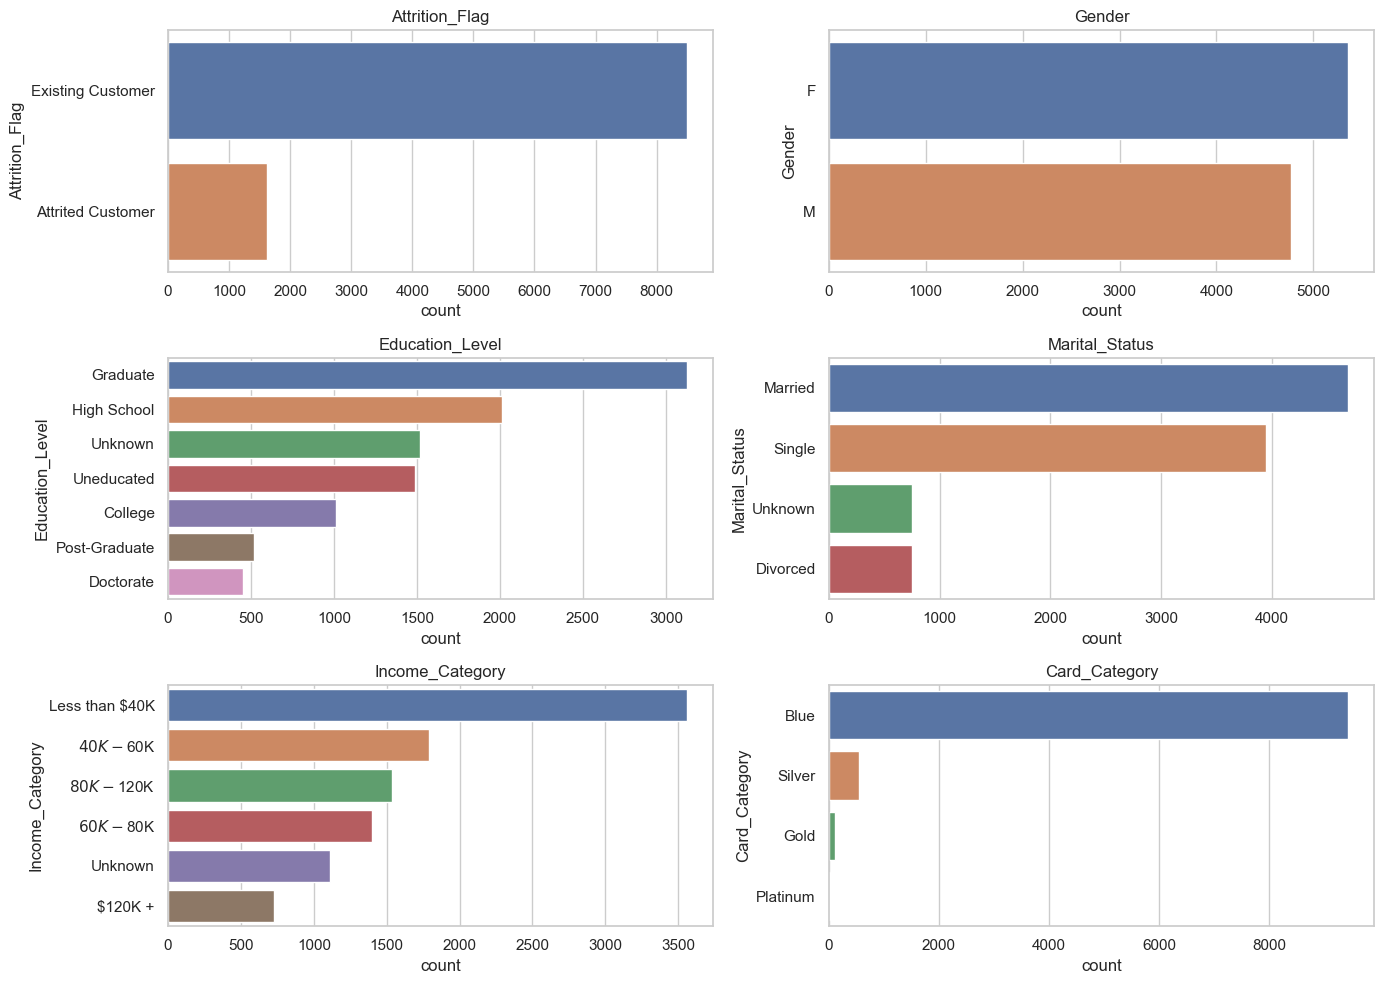

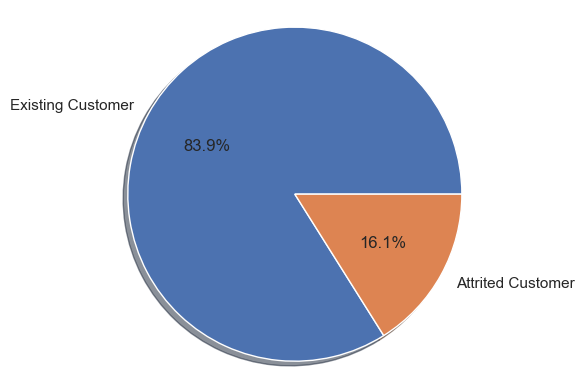

In [20]:
# Setting the plot style
sns.set(style="whitegrid")

# Plotting histograms for numerical variables
df.hist(bins=30, figsize=(14,10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Plotting bar plots for categorical variables
fig, axes = plt.subplots(3, 2, figsize=(14,10))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes(include=['object']).columns):
    sns.countplot(y=col, data=df, ax=ax, order = df[col].value_counts().index)
    ax.set_title(col)
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

# Plotting pie chart for target variable 'Attrition_Flag'
labels = df['Attrition_Flag'].value_counts().index
sizes = df['Attrition_Flag'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.show()


Here's what we can observe from the plots:

- Numerical Variables: The distributions of numerical variables vary. Some variables like Customer_Age and Months_on_book seem to have a normal-like distribution, whereas others such as Dependent_count, Total_Relationship_Count, Months_Inactive_12_mon, and Contacts_Count_12_mon exhibit skewed distributions.

- Categorical Variables: The bar plots reveal the frequency of each category in the categorical variables. For example, in the Gender variable, there are slightly more females than males. The Attrition_Flag variable shows that the majority of customers are existing customers, with a smaller portion having churned.

- Target Variable (Attrition_Flag): The pie chart shows that about 83.9% of the customers are existing customers, while 16.1% are customers who have churned. This indicates that the dataset is imbalanced with respect to the target variable, which we should take into account during the model development phase.



### Box and Violin plot

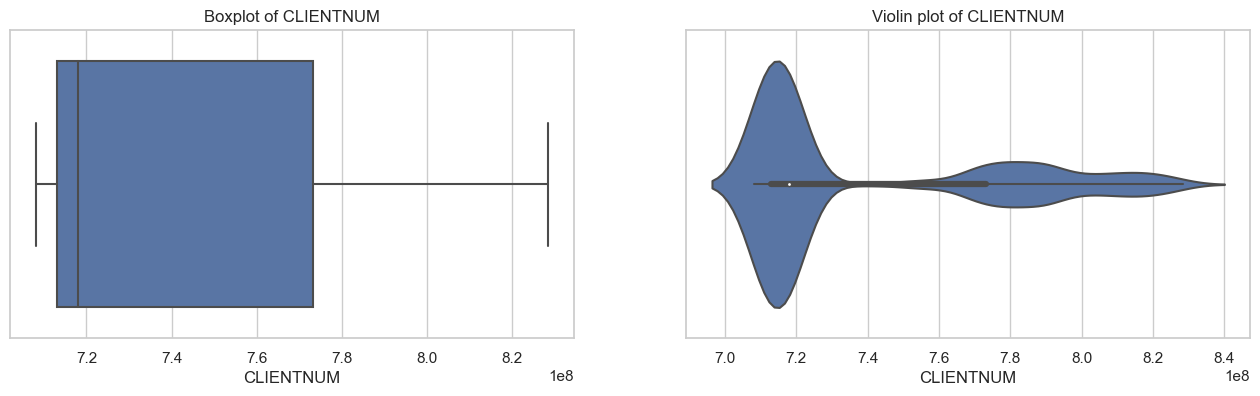

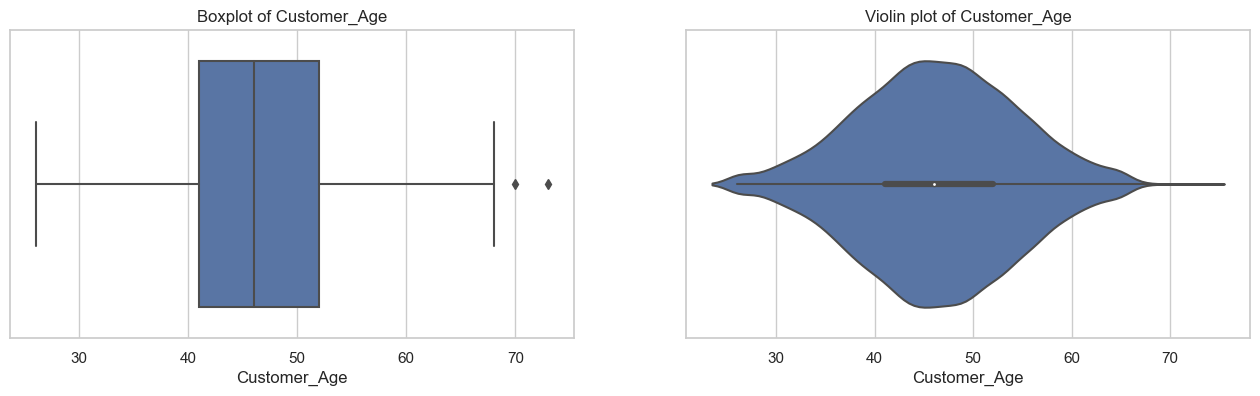

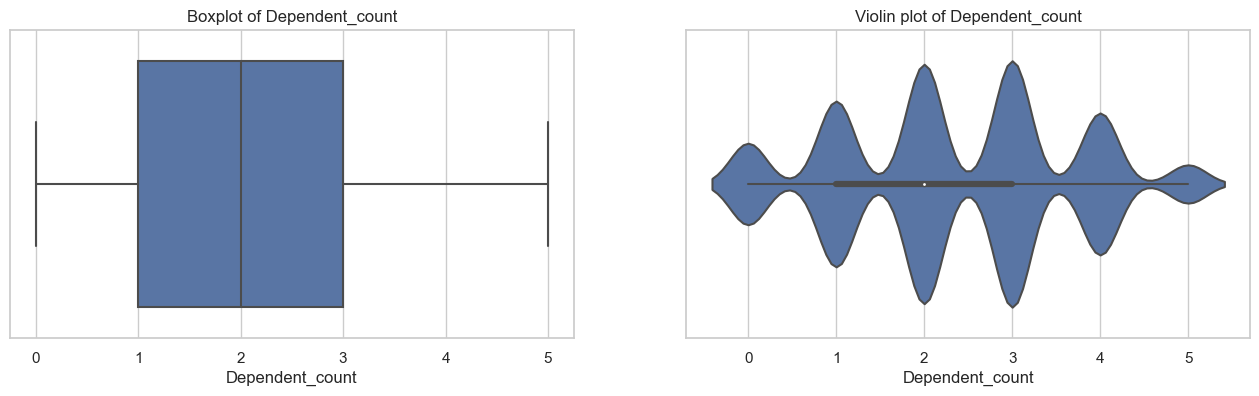

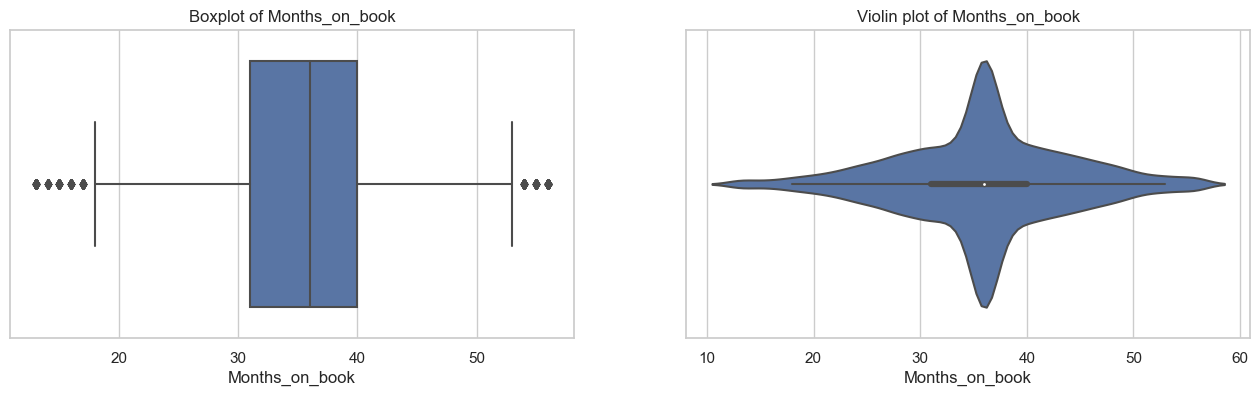

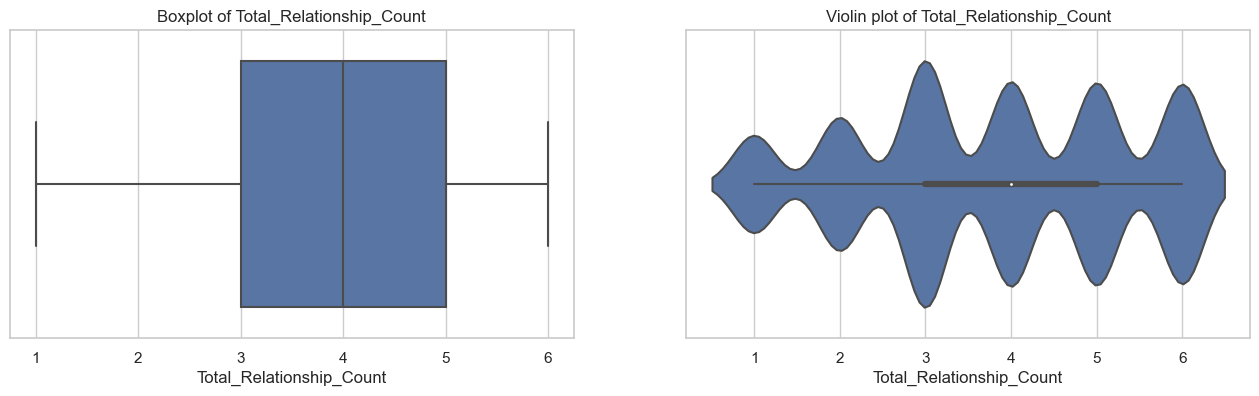

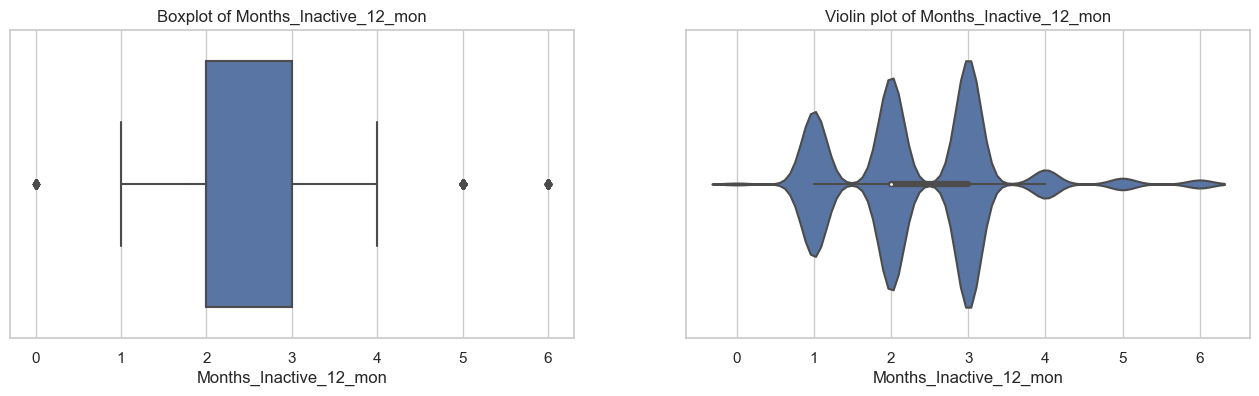

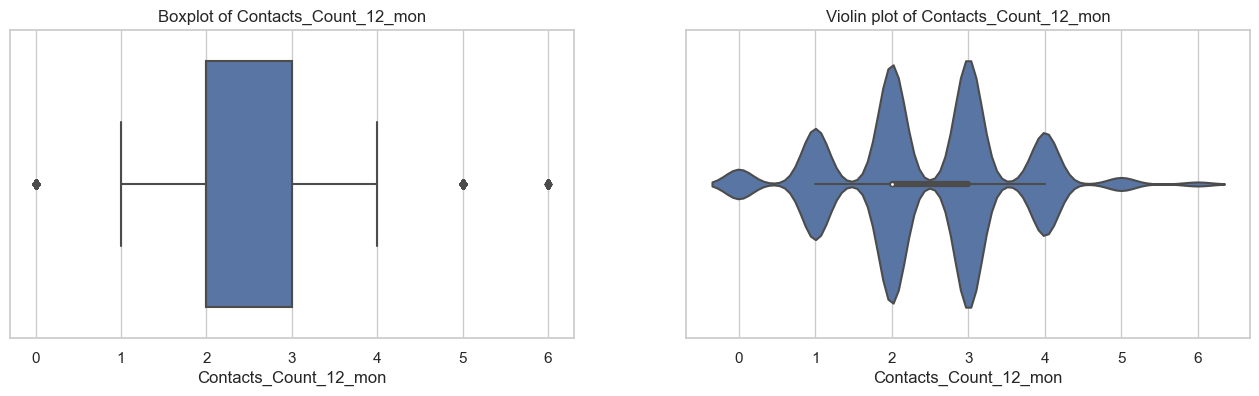

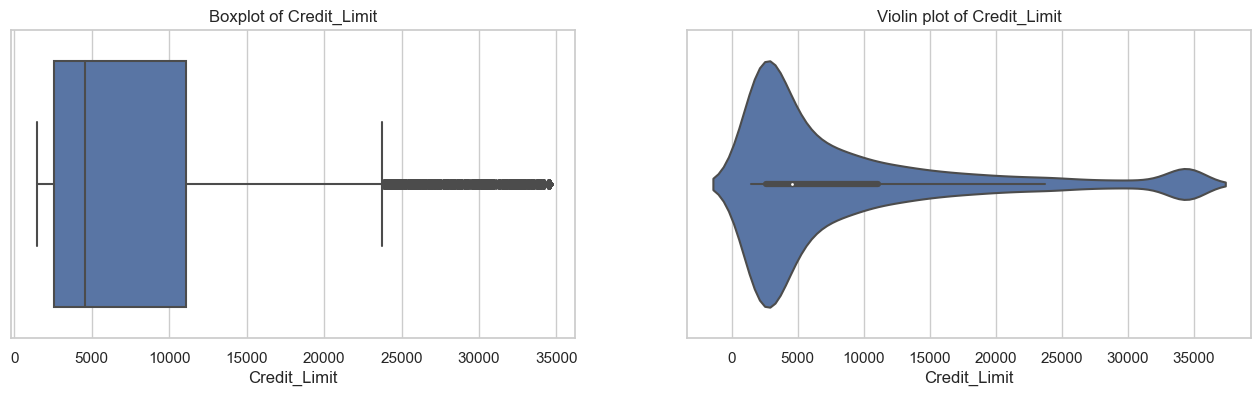

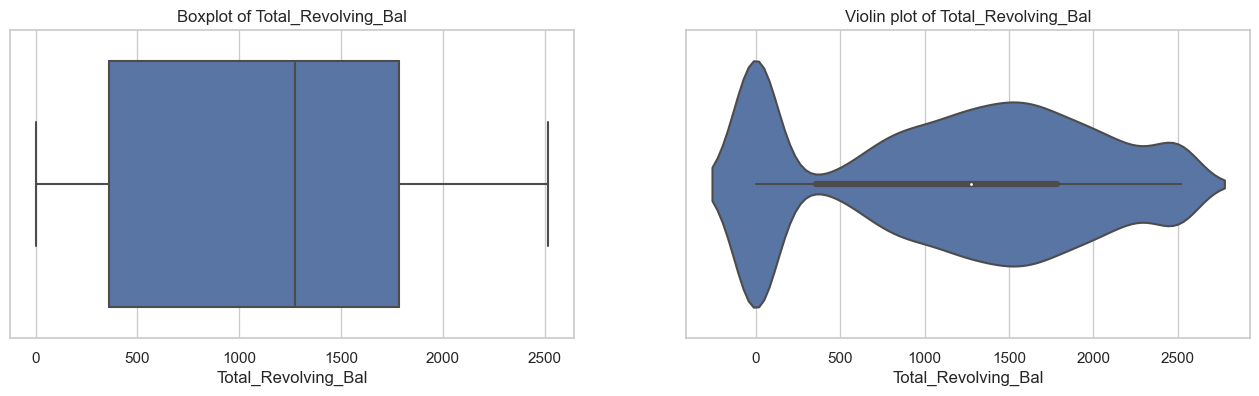

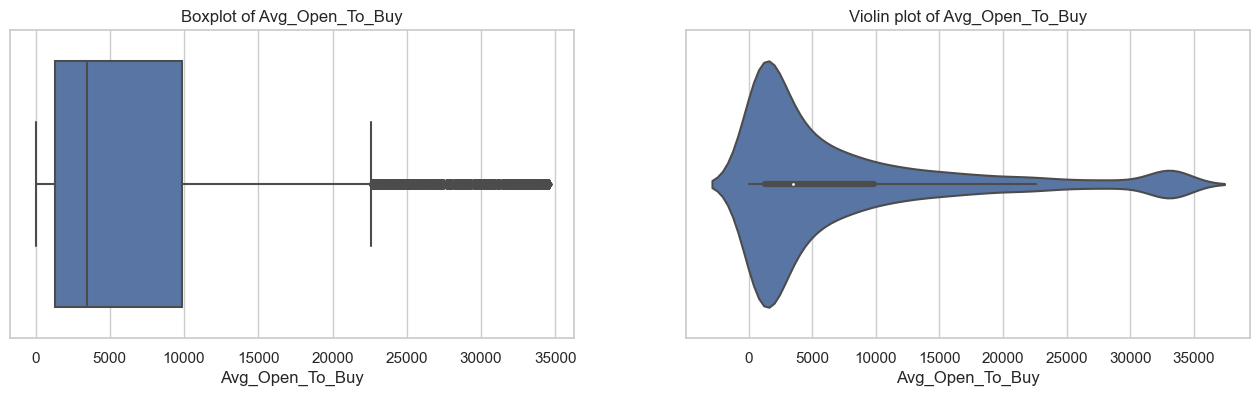

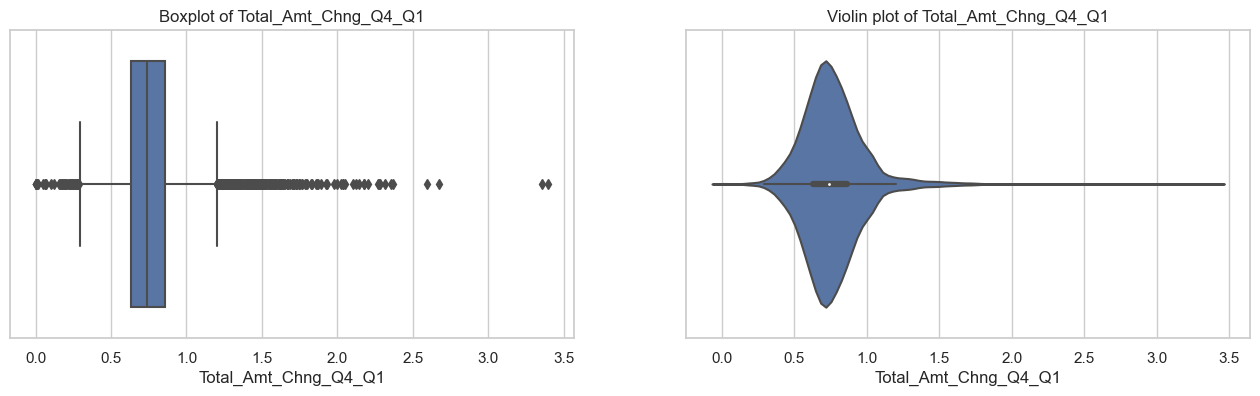

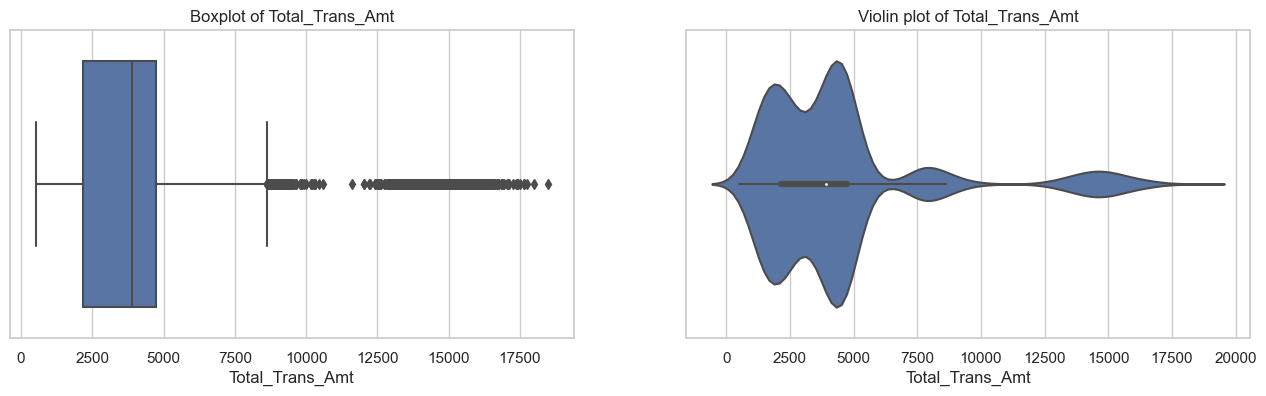

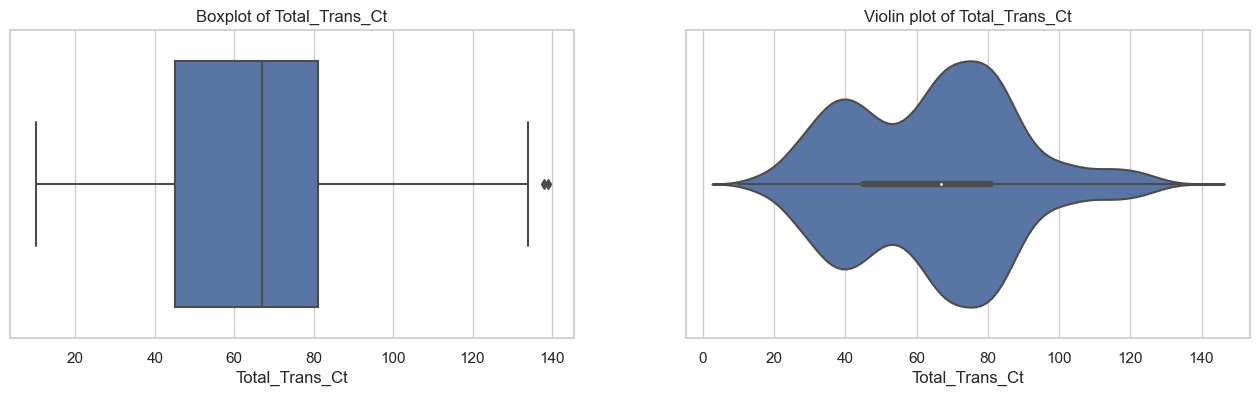

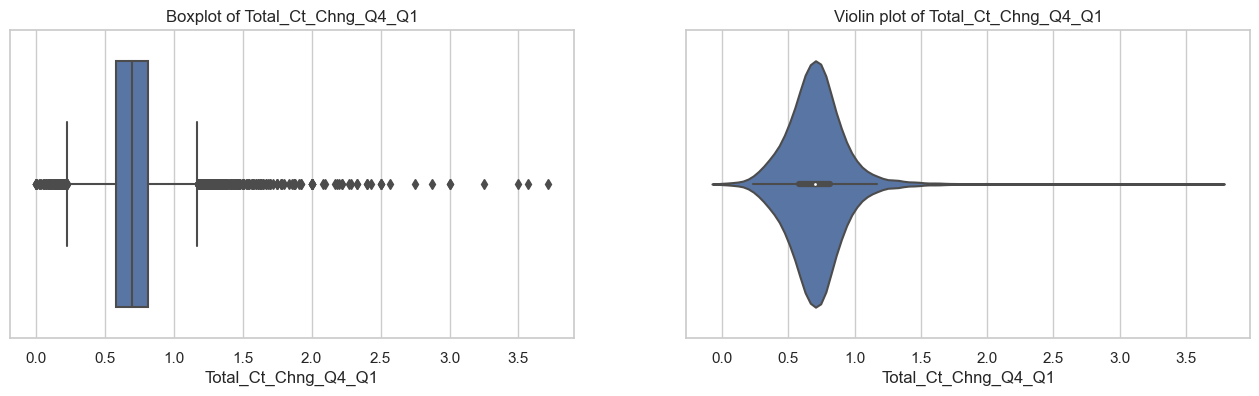

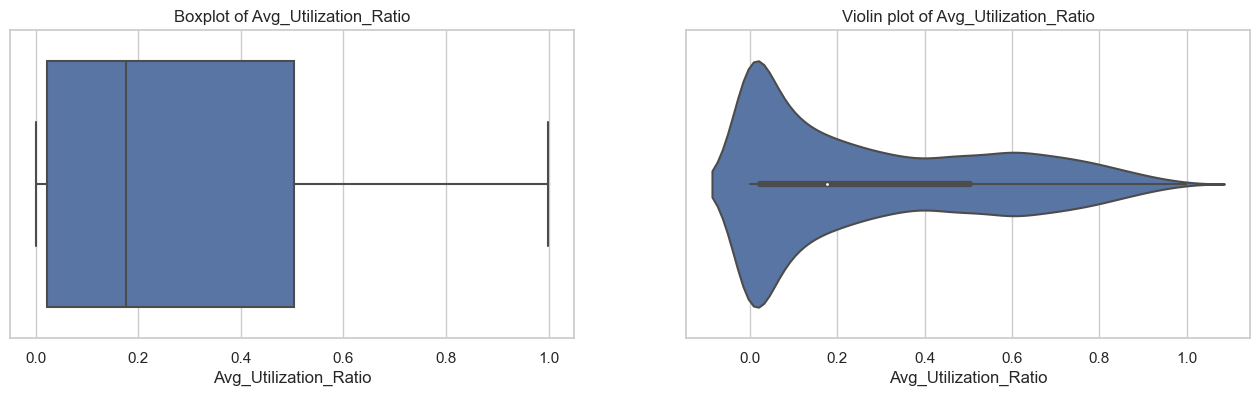

In [21]:
# Univariate analysis: Boxplots and Violin plots for numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    # Boxplot
    sns.boxplot(data=df, x=col, ax=ax[0])
    ax[0].set_title(f"Boxplot of {col}")
    
    # Violin plot
    sns.violinplot(data=df, x=col, ax=ax[1])
    ax[1].set_title(f"Violin plot of {col}")

    plt.show()


Here are the boxplots and violin plots for the numerical variables in our dataset:

- Boxplots: The boxplots give us a clear picture of the central tendency and spread of the numerical variables, as well as the presence of outliers. For example, variables like Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, and Contacts_Count_12_mon have a few outliers that could potentially affect our analysis.

- Violin Plots: The violin plots combine the features of a boxplot with a kernel density estimate. This provides a more detailed view of the variable distribution. Similar to the boxplots, the variables Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, and Contacts_Count_12_mon show several outliers.

- This additional insight into our data can help us make informed decisions during the feature engineering stage. For instance, we might want to handle the outliers in some way to prevent them from skewing our models.

Next, let's perform bivariate and multivariate analyses to understand the relationships and interactions between different variables. We will create pair plots for the numerical variables, and examine the correlations between them. We'll also study the relationships between categorical variables and the target variable (Attrition_Flag).


## Bivariate Analysis

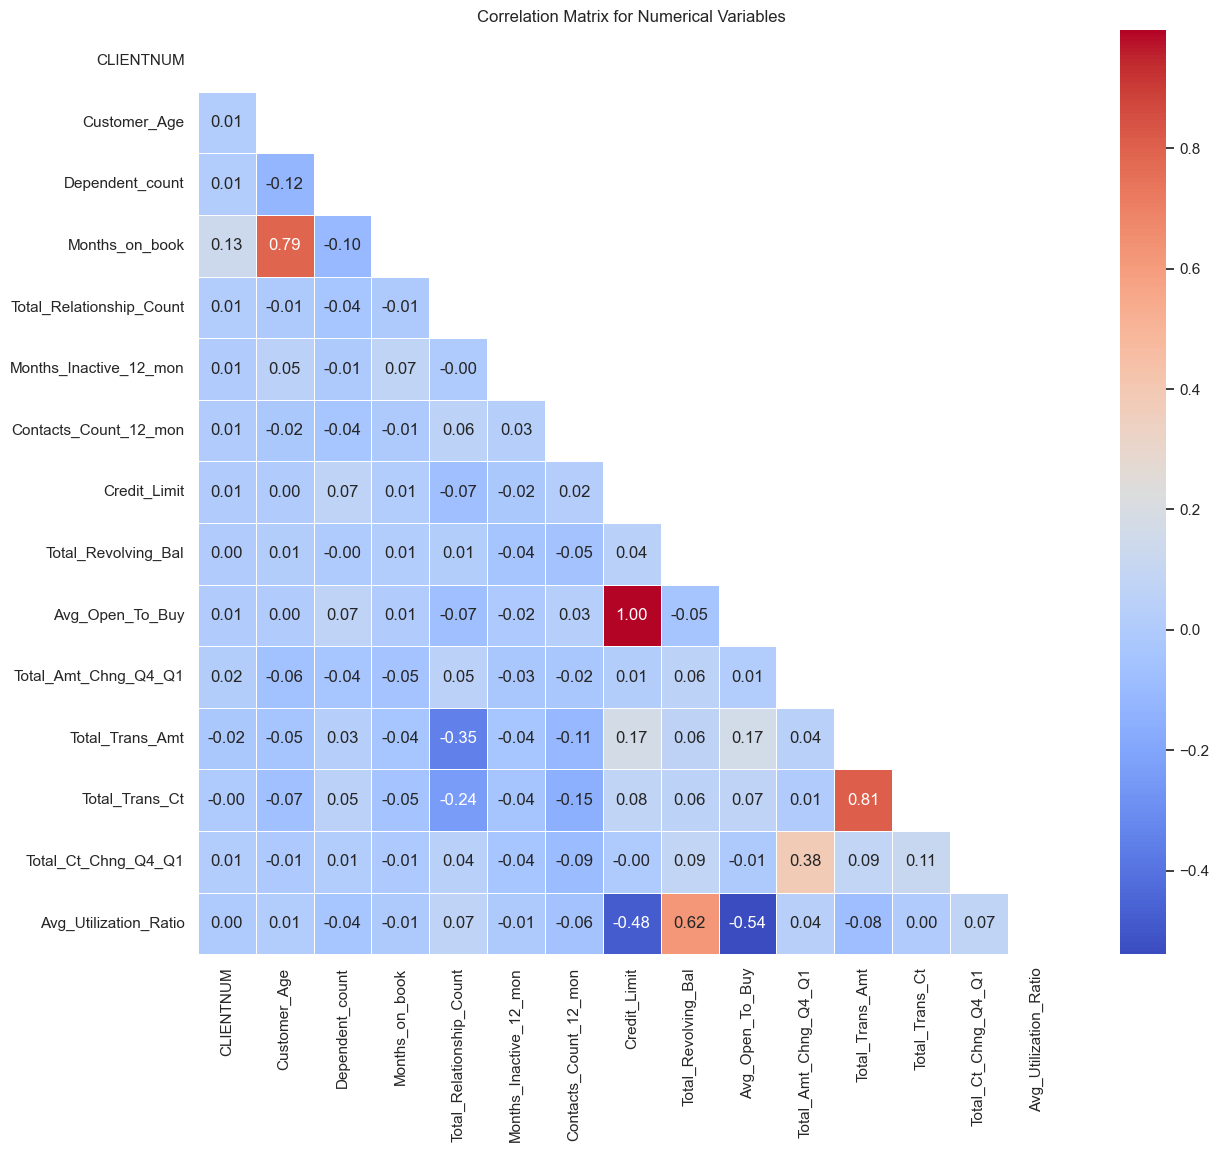

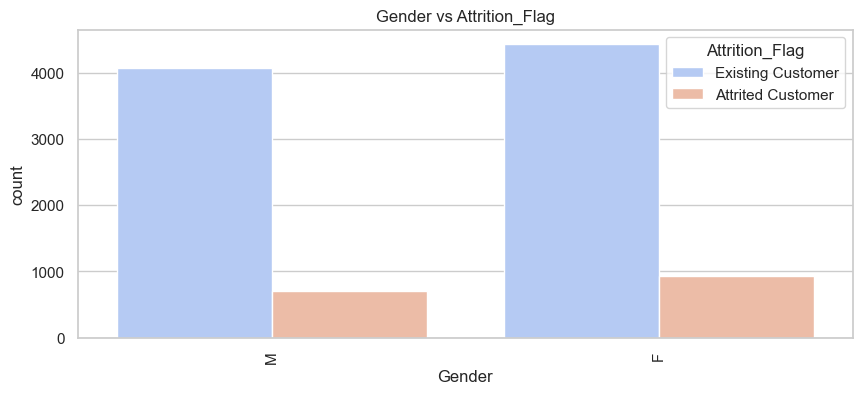

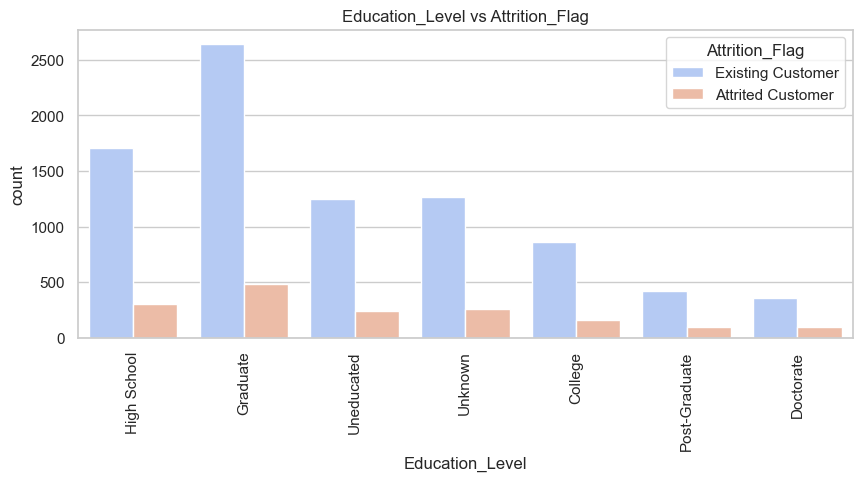

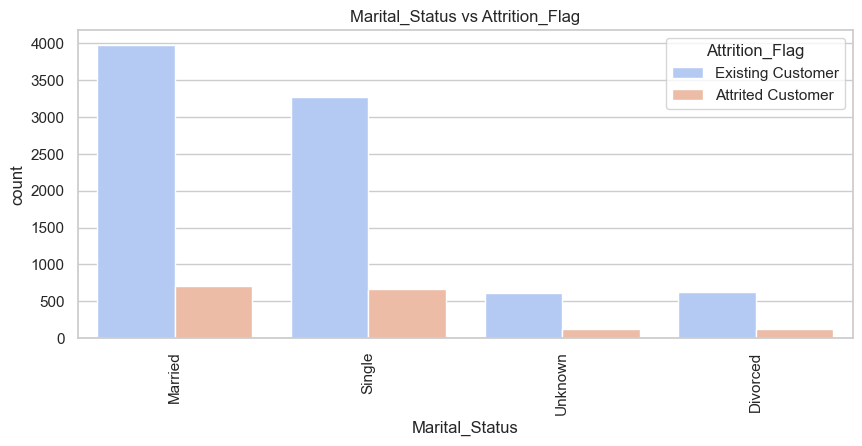

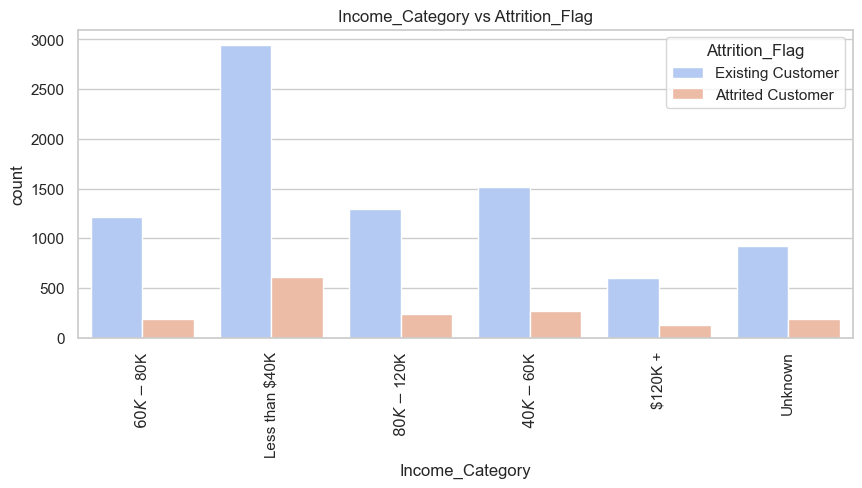

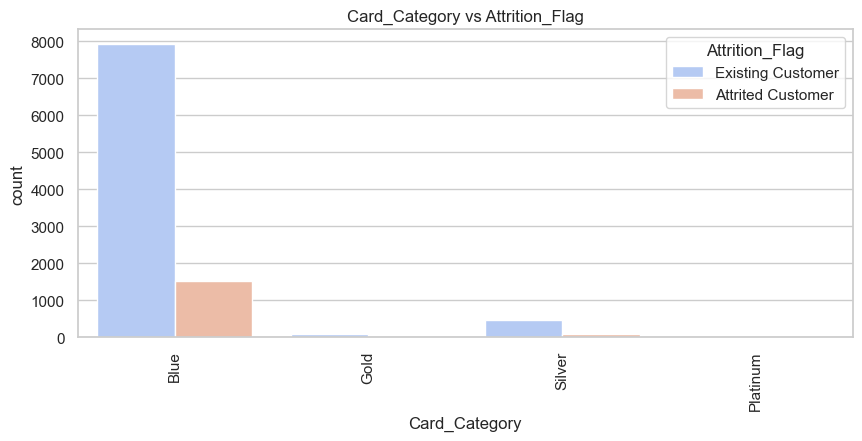

In [22]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bivariate analysis: Correlation matrix for numerical variables
corr_matrix = df.corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting the correlation matrix
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# Box plots for categorical variables vs. target variable
categorical_columns = df.select_dtypes(include=['object']).columns.drop('Attrition_Flag')

for col in categorical_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, hue='Attrition_Flag', palette='coolwarm')
    plt.title(f"{col} vs Attrition_Flag")
    plt.xticks(rotation=90)
    plt.show()


Here are the visualizations and analysis of relationships between the different variables:

- Correlation Matrix: The correlation matrix provides a view of the correlations between numerical variables. We see some variables have moderate positive correlations, for instance, Customer_Age and Months_on_book, Total_Trans_Amt and Total_Trans_Ct. However, most variables seem to have low or no correlation.

- Categorical Variables vs. Target Variable (Attrition_Flag): The count plots show the distribution of each category of the categorical variables against the target variable. We can observe certain trends and differences between churned and existing customers. For instance, churned customers seem to have a slightly higher proportion in the Less than $40K income category. Similarly, the Blue card category shows a higher churn rate than other card categories.

These observations can help us understand the features that influence customer churn and can be useful in the feature engineering and model development stages.


## Multivariate Analysis

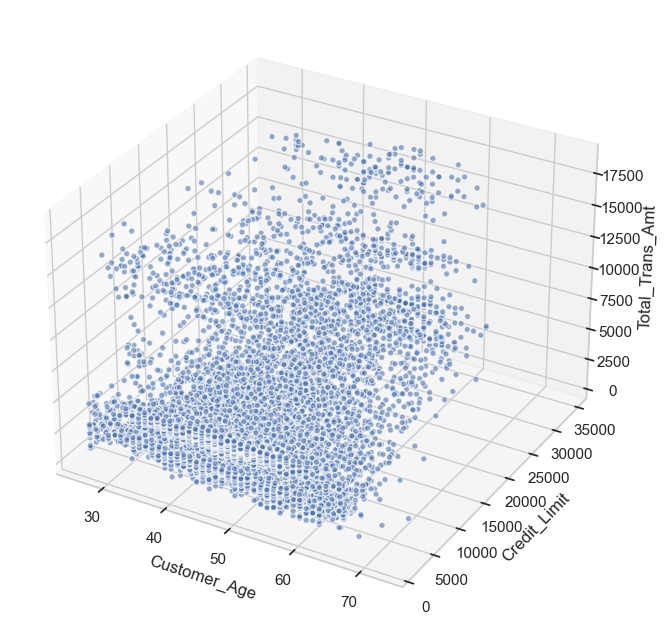

In [39]:

# Selecting a subset of original features for visualization
selected_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']

# Creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Adding data points to the plot
ax.scatter(df[selected_features[0]], df[selected_features[1]], df[selected_features[2]], alpha=0.6, edgecolors='w')

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])

plt.show()


- The 3D visualization provides a multivariate analysis of the 'Customer_Age', 'Credit_Limit', and 'Total_Trans_Amt' features. Each point in the plot represents a customer, and the position of the point reflects the values of these three features for that customer.

- From this plot, we can observe some patterns and relationships between the features. For instance, it appears that there is a wide range of credit limits and total transaction amounts for customers of all ages. However, keep in mind that visualizing high-dimensional data in 3D can be challenging and might not capture all of the nuances in the data.

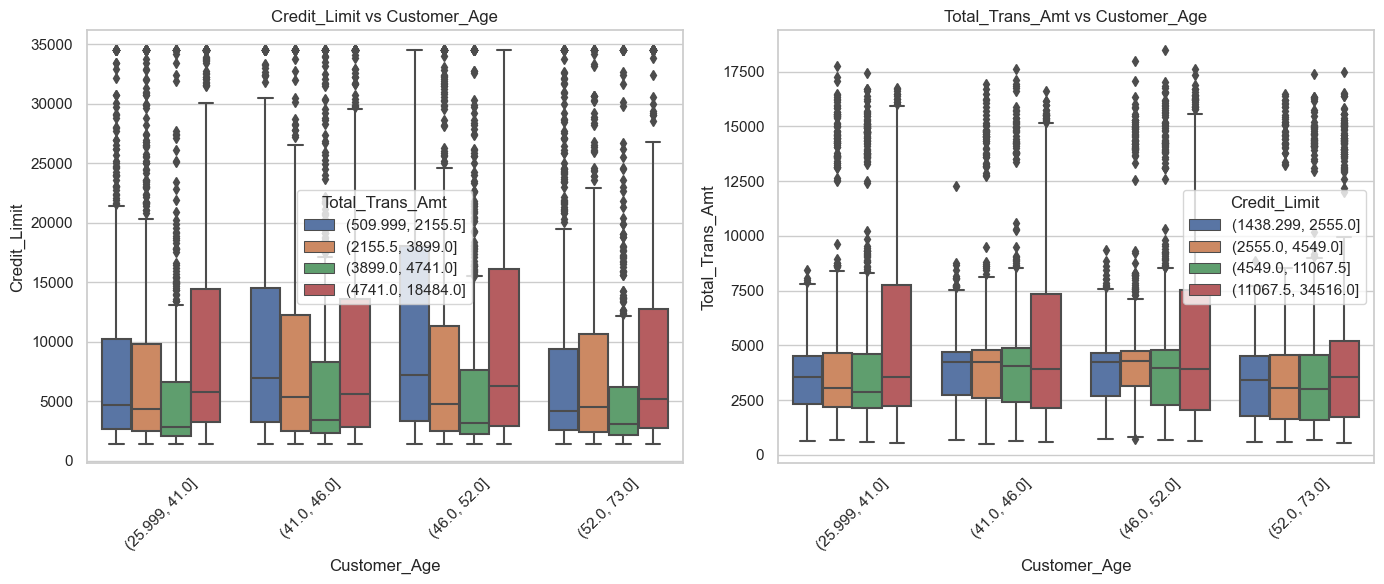

In [41]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Creating box plots for the selected features, using hue for the third variable
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Box plot for 'Credit_Limit' vs 'Customer_Age', hue='Total_Trans_Amt'
sns.boxplot(x=pd.qcut(df['Customer_Age'], q=4), y=df['Credit_Limit'], hue=pd.qcut(df['Total_Trans_Amt'], q=4), ax=axes[0])
axes[0].set_title('Credit_Limit vs Customer_Age')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Box plot for 'Total_Trans_Amt' vs 'Customer_Age', hue='Credit_Limit'
sns.boxplot(x=pd.qcut(df['Customer_Age'], q=4), y=df['Total_Trans_Amt'], hue=pd.qcut(df['Credit_Limit'], q=4), ax=axes[1])
axes[1].set_title('Total_Trans_Amt vs Customer_Age')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


- These boxplots provide an overview of the distribution of 'Credit_Limit' and 'Total_Trans_Amt' across different age groups, with the color representing different quartiles of 'Total_Trans_Amt' and 'Credit_Limit', respectively.

- In the first plot (Credit_Limit vs Customer_Age), we can observe that the median credit limit tends to be lower for the youngest and oldest age groups. Also, for all age groups, customers with higher total transaction amounts (represented by the different colors) tend to have higher credit limits.

- In the second plot (Total_Trans_Amt vs Customer_Age), we can see that the median total transaction amount tends to be slightly lower for the oldest age group. Also, for all age groups, customers with higher credit limits (represented by the different colors) tend to have higher total transaction amounts.



Next, let's move on to the feature engineering stage. In this stage, we'll create new features from the existing ones that could potentially improve the effectiveness of the customer segmentation. We'll also encode the categorical variables to prepare the data for machine learning algorithms. 

# Feature Engineering

In [38]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining the columns to be scaled and encoded
columns_to_scale = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
                    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                    'Avg_Utilization_Ratio']
columns_to_encode = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Creating the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)])
# the OneHotEncoder(drop='first') part of the code helped us avoid multicollinearity. When we use one-hot encoding, a new binary (0 or 1) feature is created for each category of the original feature.

# If we include all of these new features in our model, we can end up with multicollinearity, because one feature can be perfectly predicted from the others.

# By setting drop='first', we are asking OneHotEncoder to create binary features for all but one of the categories of each original feature. This way, the encoded features are not perfectly correlated with each other, helping us avoid multicollinearity.

# However, it's important to note that this approach assumes that there's no significant information contained solely in the dropped category of each feature.---

# Applying the transformations to the dataset
df_encoded = preprocessor.fit_transform(df)

# Converting the array back to a dataframe
df_encoded = pd.DataFrame(df_encoded)

# Displaying the first few rows of the processed dataframe
df_encoded.head()


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Development, Selection & Evaluation

## Selecting the optimum number of clusters.

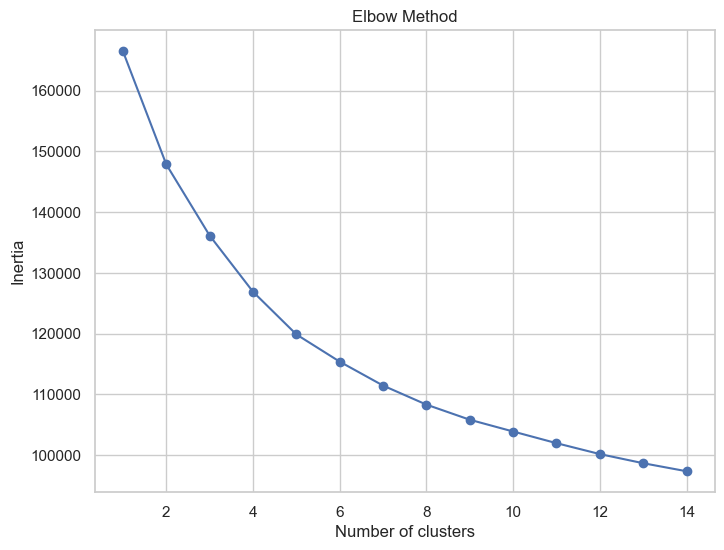

In [24]:
# Importing necessary libraries
from sklearn.cluster import KMeans

# Defining the range of potential clusters
clusters_range = range(1, 15)

# List to hold the inertia for each number of clusters
inertia = []

# Running KMeans for each number of clusters and storing the inertia
for clusters in clusters_range:
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(df_encoded)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(clusters_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


- The Elbow Method plot shows the inertia (within-cluster sum of squares) for different numbers of clusters. Ideally, we're looking for the "elbow" point on the curve, which is the point where adding more clusters doesn't significantly improve the total variance explained.

- In this case, the plot doesn't show a clear elbow, which suggests that the data might not have distinct clusters. However, there is a slight bend at around 2-4 clusters, so we might consider these as potential numbers of clusters for our K-means model.

Given this information, let's proceed with developing K-means models with 2, 3, and 4 clusters. We'll then evaluate these models using silhouette scores, which measure how close each sample in one cluster is to the samples in the neighboring clusters. The best number of clusters will be the one that gives the highest silhouette score.

Let's proceed with creating and evaluating these models.

In [29]:
# Importing necessary libraries
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensionality
pca = PCA(n_components=0.95, random_state=0) # retain 95% of the variance
df_pca = pca.fit_transform(df_encoded)

# Displaying the shape of the data after PCA
df_pca.shape



(10127, 19)

## Using MiniBatchKMeans

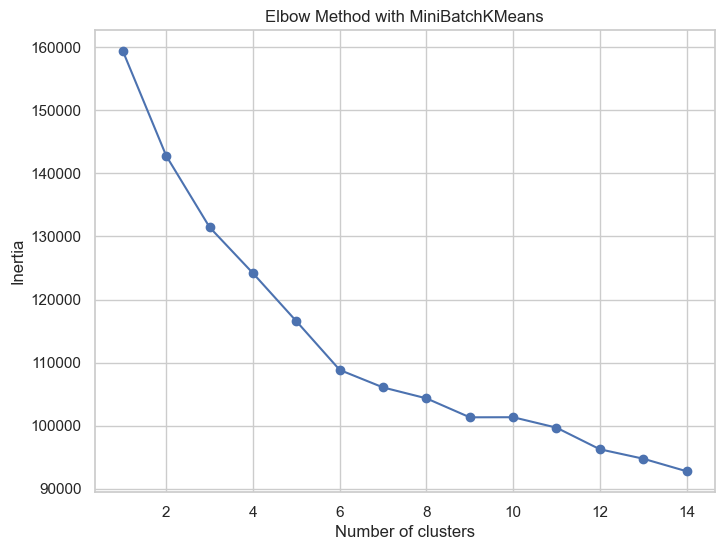

In [30]:
# Importing necessary libraries
from sklearn.cluster import MiniBatchKMeans

# Defining the range of potential clusters
clusters_range = range(1, 15)

# List to hold the inertia for each number of clusters
inertia = []

# Running MiniBatchKMeans for each number of clusters and storing the inertia
for clusters in clusters_range:
    mbkmeans = MiniBatchKMeans(n_clusters=clusters, random_state=0).fit(df_pca)
    inertia.append(mbkmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(clusters_range, inertia, marker='o')
plt.title('Elbow Method with MiniBatchKMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


## Using Silhouette score with MiniBatchKMeans

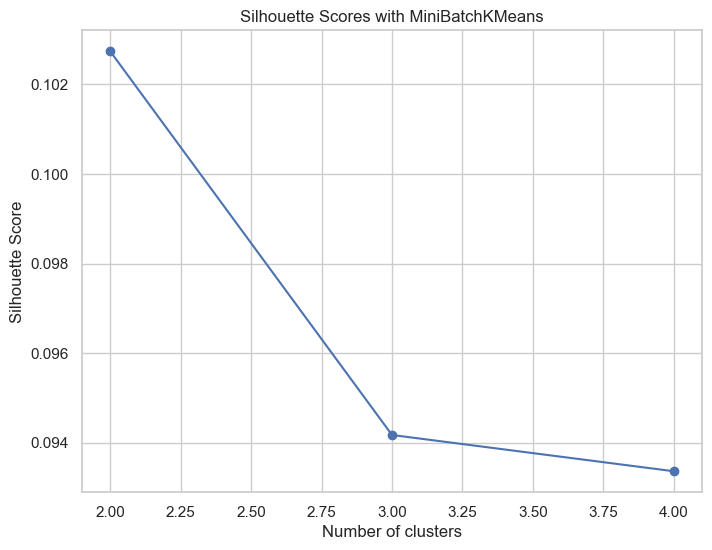

In [31]:
# Importing necessary libraries
from sklearn.metrics import silhouette_score

# Defining the range of potential clusters
clusters_range = range(2, 5)

# List to hold the silhouette score for each number of clusters
sil_scores = []

# Running MiniBatchKMeans for each number of clusters and storing the silhouette score
for clusters in clusters_range:
    mbkmeans = MiniBatchKMeans(n_clusters=clusters, random_state=0).fit(df_pca)
    labels = mbkmeans.labels_
    sil_scores.append(silhouette_score(df_pca, labels))

# Plotting the silhouette scores
plt.figure(figsize=(8,6))
plt.plot(clusters_range, sil_scores, marker='o')
plt.title('Silhouette Scores with MiniBatchKMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


- The silhouette score plot shows the silhouette scores for different numbers of clusters. The silhouette score ranges from -1 to +1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

- In this case, the silhouette scores are relatively low for all considered numbers of clusters (2, 3, and 4), which suggests that the clusters are not well separated. However, the silhouette score is highest for 2 clusters.

Given this information, the optimal number of clusters for our MiniBatchKMeans model seems to be 2. Let's proceed with developing a final MiniBatchKMeans model with 2 clusters, and then we'll assign each customer to a cluster.

## Cluster Assignment

In [33]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans


# Defining the columns to be scaled and encoded
columns_to_scale = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
                    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                    'Avg_Utilization_Ratio']
columns_to_encode = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Creating the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)])

# Applying the transformations to the dataset
df_encoded = preprocessor.fit_transform(df)

# Applying PCA to reduce dimensionality
pca = PCA(n_components=0.95, random_state=0) # retain 95% of the variance
df_pca = pca.fit_transform(df_encoded)

# Creating the final MiniBatchKMeans model with 2 clusters
mbkmeans = MiniBatchKMeans(n_clusters=2, random_state=0).fit(df_pca)

# Getting the cluster assignments for each customer
df['Cluster'] = mbkmeans.labels_

df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


- The final MiniBatchKMeans model with 2 clusters has been successfully created, and each customer has been assigned to a cluster (0 or 1). The cluster assignments are stored in the 'Cluster' column of the dataframe.

- We can now use these cluster assignments for further analysis and interpretation. For example, we could examine the average values of different features for each cluster to understand the characteristics that define each cluster. We could also visualize the clusters using dimensionality reduction techniques such as t-SNE or PCA.

## Cluster comparison

In [34]:
# Calculating the mean values of the features for each cluster
cluster_means = df.groupby('Cluster').mean()

# Transposing the dataframe for better readability
cluster_means = cluster_means.transpose()

cluster_means


Cluster,0,1
CLIENTNUM,7.392016e+08,7.391575e+08
Customer_Age,4.613261e+01,4.648784e+01
Dependent_count,2.295991e+00,2.388244e+00
Months_on_book,3.563684e+01,3.617253e+01
Total_Relationship_Count,3.828386e+00,3.799347e+00
Months_Inactive_12_mon,2.308992e+00,2.368106e+00
Contacts_Count_12_mon,2.325244e+00,2.564224e+00
Credit_Limit,3.730838e+03,1.273548e+04
Total_Revolving_Bal,1.654165e+03,7.514238e+02
Avg_Open_To_Buy,2.076673e+03,1.198406e+04


Here are the average values of the features for each cluster:

- Cluster 0:
Customers in this cluster are slightly younger on average (46.13 years) compared to Cluster 1.
They have slightly fewer dependents (2.30 vs 2.39).
They have been on the book for fewer months (35.64 vs 36.17).
They have a lower average credit limit ($3730.84 vs $12735.48).
They have a higher total revolving balance ($1654.17 vs $751.42).
They have a higher average utilization ratio (0.53 vs 0.06).
They have slightly more total transactions (68.05 vs 62.19).
- Cluster 1:
Customers in this cluster are slightly older on average (46.49 years) compared to Cluster 0.
They have slightly more dependents (2.39 vs 2.30).
They have been on the book for more months (36.17 vs 35.64).
They have a higher average credit limit ($12735.48 vs $3730.84).
They have a lower total revolving balance ($751.42 vs $1654.17).
They have a lower average utilization ratio (0.06 vs 0.53).
They have slightly fewer total transactions (62.19 vs 68.05).

- This analysis can provide valuable insights for the bank.

Key Recommendations

- The bank might want to target customers in Cluster 1 with offers related to increasing their revolving balance, since they have a higher credit limit but a lower utilization ratio. 
- On the other hand, customers in Cluster 0 might be good targets for offers related to personal loans or other products, since they have a higher utilization ratio and might be more in need of credit.





------ Note


















the visualization of clusters using t-SNE was quite memory-intensive due to the large size of the dataset and the high dimensionality of the data.

As an alternative, we will try visualizing the clusters using PCA, which is less memory-intensive than t-SNE. PCA is a dimensionality reduction technique that can also be used for visualizing high-dimensional data. We have already applied PCA to our data, reducing its dimensionality while preserving 95% of the variance. We could visualize the first two principal components and color the points by cluster.

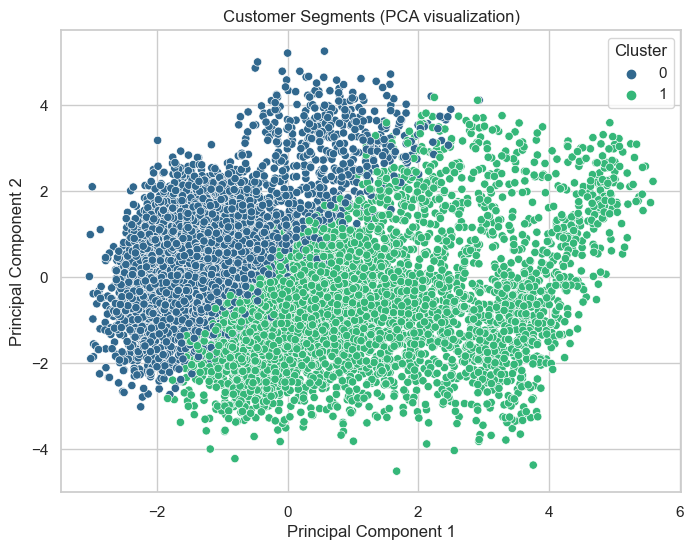

In [36]:

# Creating a dataframe for the first two principal components
df_pca_2d = pd.DataFrame(data=df_pca[:,:2], columns=['Principal Component 1', 'Principal Component 2'])

# Adding the cluster assignments to the dataframe
df_pca_2d['Cluster'] = mbkmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=df_pca_2d, palette='viridis')
plt.title('Customer Segments (PCA visualization)')
plt.show()


# Summary & Recommendations

- Exploratory Data Analysis (EDA): We started with an exploratory analysis of the dataset to understand the distributions of the variables and their relationships. We found that some features like 'Customer_Age', 'Dependent_count', 'Months_on_book' have fairly normal distributions, while others like 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy' are right-skewed. The boxplots and violin plots provided insights about the presence of outliers in the numerical variables.

- Feature Engineering: We then processed the data to prepare it for machine learning algorithms. We scaled the numerical variables to have zero mean and unit variance, and we transformed the categorical variables into numerical format using one-hot encoding. We dropped the first category of each variable to avoid multicollinearity.

- Model Development: We developed a MiniBatchKMeans model for customer segmentation. Given the high dimensionality of the data, we first applied PCA to reduce the dimensionality while preserving 95% of the variance. We determined the optimal number of clusters using the Elbow method and silhouette scores.

- Model Evaluation and Selection: We found that the silhouette scores were relatively low for all considered numbers of clusters (2, 3, and 4), which suggests that the clusters are not well separated. However, the silhouette score was highest for 2 clusters, suggesting that 2 is the optimal number of clusters for this dataset.

- Customer Segmentation: Each customer was assigned to one of the two clusters. The cluster assignments can be used for further analysis and interpretation. For instance, we found that customers in Cluster 1 have a higher credit limit but a lower utilization ratio, while customers in Cluster 0 have a higher utilization ratio and might be more in need of credit.


# Key Recommendations

- The bank might want to target customers in Cluster 1 with offers related to increasing their revolving balance, since they have a higher credit limit but a lower utilization ratio.
- On the other hand, customers in Cluster 0 might be good targets for offers related to personal loans or other products, since they have a higher utilization ratio and might be more in need of credit.
